<a href="https://colab.research.google.com/github/helinatefera/10xweek3/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import csv
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# converting txt to csv
input_file = '/content/MachineLearningRating_v3.txt'
output_file = 'data.csv'


with open(input_file, 'r') as txt_file, open(output_file, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in txt_file:
        if line.strip():
            row = line.strip().split('|')
            csv_writer.writerow(row)

print(f"Conversion completed. CSV file saved as {output_file}")


Conversion completed. CSV file saved as data.csv


In [15]:
data = pd.read_csv('/content/data.csv')

<ipython-input-15-98f8e082aadb>:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/data.csv')


In [16]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [19]:
len(data)

496355

## **Data Summarization**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496355 entries, 0 to 496354
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UnderwrittenCoverID       496355 non-null  int64  
 1   PolicyID                  496355 non-null  int64  
 2   TransactionMonth          496355 non-null  object 
 3   IsVATRegistered           496355 non-null  bool   
 4   Citizenship               496355 non-null  object 
 5   LegalType                 496355 non-null  object 
 6   Title                     496355 non-null  object 
 7   Language                  496355 non-null  object 
 8   Bank                      463195 non-null  object 
 9   AccountType               466473 non-null  object 
 10  MaritalStatus             496355 non-null  object 
 11  Gender                    496355 non-null  object 
 12  Country                   496355 non-null  object 
 13  Province                  496355 non-null  o

In [24]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = "data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Numerical columns for descriptive stats
numerical_columns = ["TotalPremium", "TotalClaims", "CalculatedPremiumPerTerm", "SumInsured", "cubiccapacity", "kilowatts"]

# Generate descriptive statistics
descriptive_stats = data[numerical_columns].describe()

# Variability (Standard Deviation, Variance)
variability_stats = data[numerical_columns].agg(['std', 'var'])

# Display results in a table format
print("Descriptive Statistics:")
print(tabulate(descriptive_stats, headers="keys", tablefmt="grid"))

print("\nVariability (Standard Deviation, Variance):")
print(tabulate(variability_stats.T, headers=["Metric", "Standard Deviation", "Variance"], tablefmt="grid"))

# Data structure review
data_structure = data.dtypes

print("\nData Types of Columns:")
print(tabulate(data_structure.reset_index(), headers=["Column", "Data Type"], tablefmt="grid"))

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(tabulate(categorical_columns.to_frame(name="Categorical Columns"), headers="keys", tablefmt="grid"))

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(tabulate(numerical_columns.to_frame(name="Numerical Columns"), headers="keys", tablefmt="grid"))


<ipython-input-24-40f71d759b51>:6: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Descriptive Statistics:
+-------+----------------+---------------+----------------------------+------------------+-----------------+-------------+
|       |   TotalPremium |   TotalClaims |   CalculatedPremiumPerTerm |       SumInsured |   cubiccapacity |   kilowatts |
+=======+================+===============+============================+==================+=================+=============+
| count |   496354       |   496354      |                496354      | 496354           |       496354    | 496354      |
+-------+----------------+---------------+----------------------------+------------------+-----------------+-------------+
| mean  |       63.3156  |       69.9525 |                   115.271  | 599179           |         2494.98 |     97.5701 |
+-------+----------------+---------------+----------------------------+------------------+-----------------+-------------+
| std   |      158.856   |     2435.07   |                   220.463  |      1.50417e+06 |          404.08 |     18

## **Data Quality Assessment**

In [25]:
# Calculate missing values and percentage
missing_values = data.isnull().sum()
total_rows = len(data)
missing_percentage = (missing_values / total_rows) * 100

# Create a summary table
missing_summary = pd.DataFrame({
    "Column": data.columns,
    "Missing Values": missing_values,
    "Missing (%)": missing_percentage.round(2)
})

# Filter columns with missing values
missing_summary = missing_summary[missing_summary["Missing Values"] > 0]

# Display the summary as a table
print("Missing Values Summary:")
print(tabulate(missing_summary, headers="keys", tablefmt="grid"))


Missing Values Summary:
+--------------------------+--------------------------+------------------+---------------+
|                          | Column                   |   Missing Values |   Missing (%) |
+==========================+==========================+==================+===============+
| Bank                     | Bank                     |            33160 |          6.68 |
+--------------------------+--------------------------+------------------+---------------+
| AccountType              | AccountType              |            29882 |          6.02 |
+--------------------------+--------------------------+------------------+---------------+
| mmcode                   | mmcode                   |                1 |          0    |
+--------------------------+--------------------------+------------------+---------------+
| VehicleType              | VehicleType              |                1 |          0    |
+--------------------------+--------------------------+-----------

## **Univariate Analysis**
- **Histograms for Numerical Columns:** Histograms help in understanding the distribution of numerical variables
- **Bar Charts for Categorical Columns:** Bar charts show the frequency of different categories in categorical columns



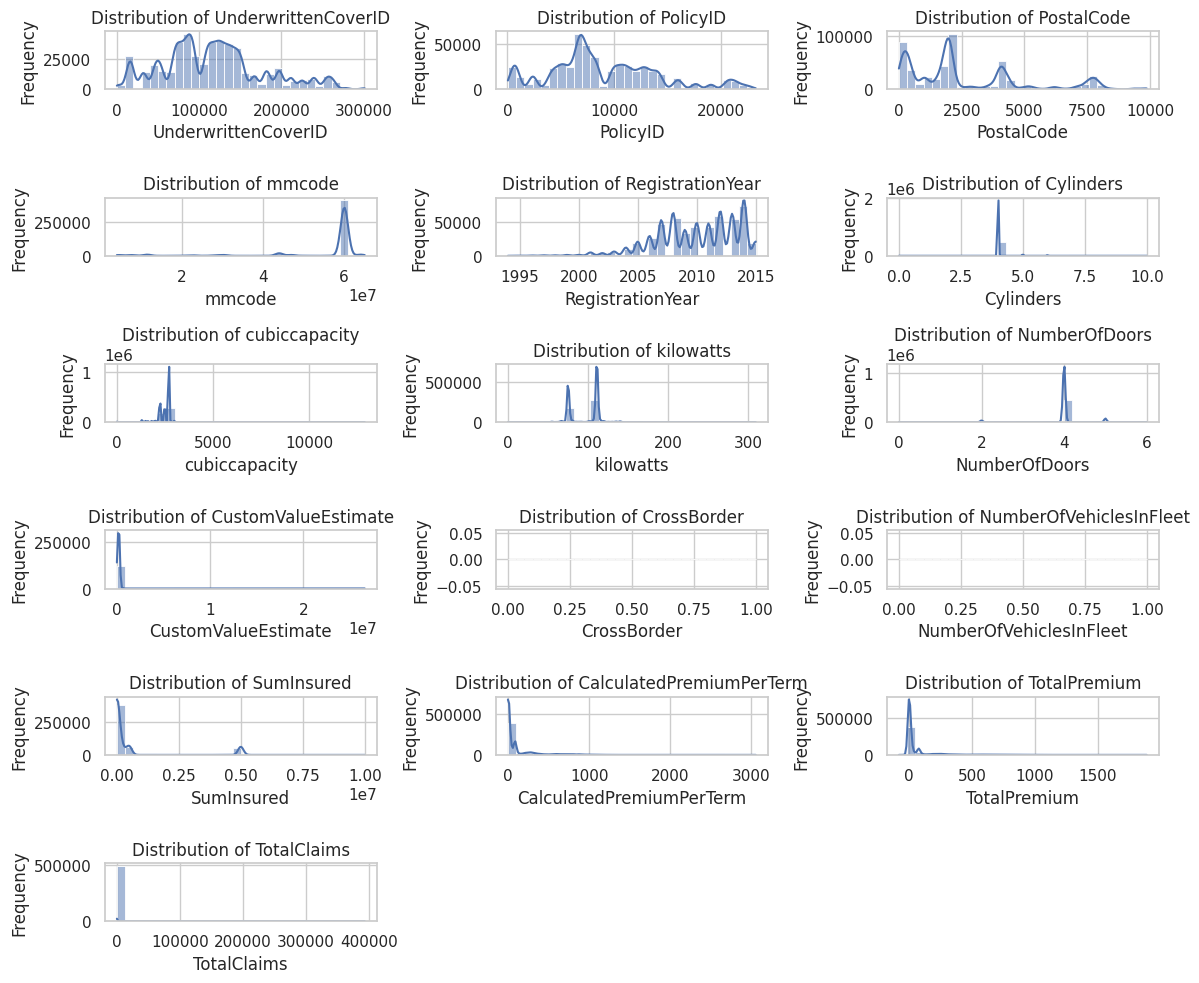

In [30]:
sns.set(style="whitegrid")
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # ensuring enough space

# Plot histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically adjust subplots
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [32]:
# Univariate Analysis for Categorical Variables (Bar Charts)
categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows dynamically

# Plot bar charts for categorical columns
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on rows
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically adjust subplots
    sns.countplot(x=data[col], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()